## install package

In [2]:
pip install shap

   ---------------------------------------- 0.0/549.1 kB ? eta -:--:--
   --------------------------------------- 549.1/549.1 kB 17.5 MB/s eta 0:00:00

   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   ---------------------------------------- 2/2 [shap]

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install --upgrade scipy

In [10]:
pip install --upgrade statsmodels

   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ---------------------------------------- 9.5/9.5 MB 53.1 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.14.4
    Uninstalling statsmodels-0.14.4:
      Successfully uninstalled statsmodels-0.14.4
Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install optuna-dashboard

   ---------------------------------------- 0.0/8.4 MB ? eta -:--:--
   -------------- ------------------------- 3.1/8.4 MB 18.7 MB/s eta 0:00:01
   ---------------------------------- ----- 7.3/8.4 MB 18.7 MB/s eta 0:00:01
   ---------------------------------------- 8.4/8.4 MB 17.5 MB/s eta 0:00:00

   -------------------- ------------------- 1/2 [optuna-dashboard]
   ---------------------------------------- 2/2 [optuna-dashboard]

Note: you may need to restart the kernel to use updated packages.


In [26]:
pip install lightgbm optuna


   ---------------------------------------- 0/4 [Mako]
   ---------------------------------------- 0/4 [Mako]
   ---------------------------------------- 0/4 [Mako]
   -------------------- ------------------- 2/4 [alembic]
   -------------------- ------------------- 2/4 [alembic]
   -------------------- ------------------- 2/4 [alembic]
   -------------------- ------------------- 2/4 [alembic]
   -------------------- ------------------- 2/4 [alembic]
   -------------------- ------------------- 2/4 [alembic]
   -------------------- ------------------- 2/4 [alembic]
   ------------------------------ --------- 3/4 [optuna]
   ------------------------------ --------- 3/4 [optuna]
   ------------------------------ --------- 3/4 [optuna]
   ------------------------------ --------- 3/4 [optuna]
   ------------------------------ --------- 3/4 [optuna]
   ------------------------------ --------- 3/4 [optuna]
   ------------------------------ --------- 3/4 [optuna]
   --------------------------

In [27]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install lightgbm

## Create regression data

In [1]:
import os
import pandas as pd
import numpy as np

TIME_FREQUENCY='5min'
DATA_DIR =  r'C:\Users\w.bi\OneDrive - IESEG\Desktop\Domino\data\G_tau33'

# REGRESSION_INPUT_VALID_G_FILE_PATH =  os.path.join(DATA_DIR, 'Endogenous_data_with_valid_G_values_prim_sec_delay_observed_rec_' + TIME_FREQUENCY + '.csv')
REGRESSION_INPUT_VALID_G_DALTA_FILE_PATH  =  os.path.join(DATA_DIR, 'Endogenous_data_with_valid_G_values_prim_sec_delay_observed_Delta_rec_' + TIME_FREQUENCY + '.csv')

pd.set_option('display.max_columns', None)

In [2]:
complx_cols = ['cnt_moves', 'cnt_platform_out_moves', 'cnt_red',
    'cnt_kruising', 'sum_pri_delay', 'cnt_pri_delay', 'cnt_change_comp',
    'cnt_trains', 'cnt_S_NORMAL', 'cnt_S_WRONG', 'cnt_signals', 'incident',
    'density', 'complexity', 'non_robustness', 'operational_factor', 'TCC_wit'
]


complx_net_cols = ['C_cnt_signals_mean', 'D_cnt_signals_mean', 'E_cnt_signals_mean',
 'G_cnt_signals_mean', 'I_cnt_signals_mean', 'M_cnt_signals_mean',
 'N_cnt_signals_mean', 'R_cnt_signals_mean', 'T_cnt_signals_mean',
 'C_incident_mean', 'D_incident_mean', 'E_incident_mean',
 'G_incident_mean', 'I_incident_mean', 'M_incident_mean',
 'N_incident_mean', 'R_incident_mean', 'T_incident_mean',
 'C_density_mean', 'D_density_mean', 'E_density_mean',
 'G_density_mean', 'I_density_mean', 'M_density_mean',
 'N_density_mean', 'R_density_mean', 'T_density_mean',
 'C_complexity_mean', 'D_complexity_mean', 'E_complexity_mean',
 'G_complexity_mean', 'I_complexity_mean', 'M_complexity_mean',
 'N_complexity_mean', 'R_complexity_mean', 'T_complexity_mean',
 'C_non_robustness_mean', 'D_non_robustness_mean', 'E_non_robustness_mean',
 'G_non_robustness_mean', 'I_non_robustness_mean', 'M_non_robustness_mean',
 'N_non_robustness_mean', 'R_non_robustness_mean', 'T_non_robustness_mean',
 'C_operational_factor_mean', 'D_operational_factor_mean', 'E_operational_factor_mean',
 'G_operational_factor_mean', 'I_operational_factor_mean', 'M_operational_factor_mean',
 'N_operational_factor_mean', 'R_operational_factor_mean', 'T_operational_factor_mean']

thres_sec = 60

## Load our real dataset

In [3]:
sec_delay_df = pd.read_parquet(os.path.join(DATA_DIR, 'Data_for_secondary_delay_cleaned_5min.parquet'))
sec_delay_df.head(5)

,i,j,t,c,r0_5min_detection,r1_5min_detection,r2_5min_detection,delayjustifiedbyreason
0,-43095,-13745,73,1137,73,6,4,143
1,-96837,-73430,73,1137,73,6,4,115
2,-76539,-96837,74,1137,74,6,4,103
3,-15617,-73430,75,1137,75,6,4,185
4,-86247,-57615,75,1137,75,6,4,97


In [4]:
# s_r_w_df = pd.read_parquet(os.path.join(DATA_DIR, 'Data_for_function_S_r_w0_5min.parquet'))
# s_r_w_df.head(6)

s_r_w_df = pd.read_parquet(os.path.join(DATA_DIR, 'Data_for_function_S_CRIPTON_COMPLEX_5min.parquet'),
                           engine="fastparquet")

print('S_Cripton NA: ', s_r_w_df['Signal'].isna().sum())
s_r_w_df.head(10)

S_Cripton NA:  293583


,i,s,t,m,r0,r1,r2,"w(i,t)","t-w(i,t)","r0(t - max(w(i,t)))","r1(t - max(w(i,t)))","r2(t - max(w(i,t)))",Signal,Micro_time,TCC,WS_NO,cnt_moves,cnt_platform_out_moves,cnt_red,cnt_kruising,sum_pri_delay,cnt_pri_delay,cnt_change_comp,cnt_trains,cnt_S_NORMAL,cnt_S_WRONG,cnt_signals,incident,density,complexity,non_robustness,operational_factor,C_cnt_signals_mean,D_cnt_signals_mean,E_cnt_signals_mean,G_cnt_signals_mean,I_cnt_signals_mean,M_cnt_signals_mean,N_cnt_signals_mean,R_cnt_signals_mean,T_cnt_signals_mean,C_incident_mean,D_incident_mean,E_incident_mean,G_incident_mean,I_incident_mean,M_incident_mean,N_incident_mean,R_incident_mean,T_incident_mean,C_density_mean,D_density_mean,E_density_mean,G_density_mean,I_density_mean,M_density_mean,N_density_mean,R_density_mean,T_density_mean,C_complexity_mean,D_complexity_mean,E_complexity_mean,G_complexity_mean,I_complexity_mean,M_complexity_mean,N_complexity_mean,R_complexity_mean,T_complexity_mean,C_non_robustness_mean,D_non_robustness_mean,E_non_robustness_mean,G_non_robustness_mean,I_non_robustness_mean,M_non_robustness_mean,N_non_robustness_mean,R_non_robustness_mean,T_non_robustness_mean,C_operational_factor_mean,D_operational_factor_mean,E_operational_factor_mean,G_operational_factor_mean,I_operational_factor_mean,M_operational_factor_mean,N_operational_factor_mean,R_operational_factor_mean,T_operational_factor_mean
0,-53372,219,0,stop,0,6,4,8,0,0,6,4,367064.0,2023-04-01 00:02:29+02:00,I,11.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,38.0,9.0,47.0,0.0,0.32,0.0,0.00,0.0,32.200001,40.57143,58.5,37.200001,46.666668,37.5,57.333332,41.333332,44.75,1.8,0.428571,1.5,2.0,3.166667,2.0,0.0,0.0,0.25,0.099237,0.150407,0.208955,0.327273,0.210526,0.233871,0.084677,0.146597,0.066667,0.25,0.125,0.166667,0.25,0.181818,0.0,0.0,0.0,0.0,0.230769,0.054054,0.190476,0.222222,0.181818,0.310345,0.047619,0.25,0.454545,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0
1,-85230,1781,0,passing,0,6,4,127,0,0,6,4,401061.0,2023-04-01 00:03:07+02:00,R,14.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,17.0,4.0,21.0,0.0,0.18,0.0,0.33,0.0,32.200001,40.57143,58.5,37.200001,46.666668,37.5,57.333332,41.333332,44.75,1.8,0.428571,1.5,2.0,3.166667,2.0,0.0,0.0,0.25,0.099237,0.150407,0.208955,0.327273,0.210526,0.233871,0.084677,0.146597,0.066667,0.25,0.125,0.166667,0.25,0.181818,0.0,0.0,0.0,0.0,0.230769,0.054054,0.190476,0.222222,0.181818,0.310345,0.047619,0.25,0.454545,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0
2,-85230,1196,0,stop,0,6,4,147,0,0,6,4,401061.0,2023-04-01 00:03:07+02:00,R,14.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,17.0,4.0,21.0,0.0,0.18,0.0,0.33,0.0,32.200001,40.57143,58.5,37.200001,46.666668,37.5,57.333332,41.333332,44.75,1.8,0.428571,1.5,2.0,3.166667,2.0,0.0,0.0,0.25,0.099237,0.150407,0.208955,0.327273,0.210526,0.233871,0.084677,0.146597,0.066667,0.25,0.125,0.166667,0.25,0.181818,0.0,0.0,0.0,0.0,0.230769,0.054054,0.190476,0.222222,0.181818,0.310345,0.047619,0.25,0.454545,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0
3,-53372,1357,0,passing,0,6,4,-32,1,1,6,4,367064.0,2023-04-01 00:02:29+02:00,I,11.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,38.0,9.0,47.0,0.0,0.32,0.0,0.00,0.0,32.200001,40.57143,58.5,37.200001,46.666668,37.5,57.333332,41.333332,44.75,1.8,0.428571,1.5,2.0,3.166667,2.0,0.0,0.0,0.25,0.099237,0.150407,0.208955,0.327273,0.210526,0.233871,0.084677,0.146597,0.066667,0.25,0.125,0.166667,0.25,0.181818,0.0,0.0,0.0,0.0,0.230769,0.054054,0.190476,0.222222,0.181818,0.310345,0.047619,0.25,0.454545,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0
4,-54740,1584,1,passing,1,6,4,2,1,1,6,4,591991.0,2023-04-01 00:07:51+02:00,G,18.0,10.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,34.0,6.0,40.0,0.0,0.29,0.0,0.10,0.0,32.200001,40.57143,58.5,37.200001,46.666668,37.5,57.333332,41.333332,44.75,1.8,0.428571,1.5,2.0,3.166667,2.0,0.0,0.0,0.25,0.099237,0.150407,0.208955,0.327273,0.210526,0.233871,0.084677,0.146597,0.066667,0.25,0.125,0.166667,0.25,0.181818,0.0,0.0,0.0,0.0,0.230769,0.054054,0.190476,0.222222,0.181818,0.310345,0.047619,0.25,0.454545,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0
5,-54740,1840,1,passing,

In [5]:
tcc_avg = s_r_w_df.groupby(['TCC', 't'])['w(i,t)'].transform('mean')

# Step 2: Compute the average w(i,t) per t (for rows where TCC is NaN)
t_avg = s_r_w_df.groupby('t')['w(i,t)'].transform('mean')

# Step 3: Create the new column using tcc_avg if TCC is not NaN, else t_avg
s_r_w_df['TCC_wit'] = tcc_avg.where(s_r_w_df['TCC'].notna(), t_avg)

In [22]:
s_r_w_df.head(20)

,i,s,t,m,r0,r1,r2,"w(i,t)","t-w(i,t)","r0(t - max(w(i,t)))","r1(t - max(w(i,t)))","r2(t - max(w(i,t)))",Signal,Micro_time,TCC,WS_NO,cnt_moves,cnt_platform_out_moves,cnt_red,cnt_kruising,sum_pri_delay,cnt_pri_delay,cnt_change_comp,cnt_trains,cnt_S_NORMAL,cnt_S_WRONG,cnt_signals,incident,density,complexity,non_robustness,operational_factor,C_cnt_signals_mean,D_cnt_signals_mean,E_cnt_signals_mean,G_cnt_signals_mean,I_cnt_signals_mean,M_cnt_signals_mean,N_cnt_signals_mean,R_cnt_signals_mean,T_cnt_signals_mean,C_incident_mean,D_incident_mean,E_incident_mean,G_incident_mean,I_incident_mean,M_incident_mean,N_incident_mean,R_incident_mean,T_incident_mean,C_density_mean,D_density_mean,E_density_mean,G_density_mean,I_density_mean,M_density_mean,N_density_mean,R_density_mean,T_density_mean,C_complexity_mean,D_complexity_mean,E_complexity_mean,G_complexity_mean,I_complexity_mean,M_complexity_mean,N_complexity_mean,R_complexity_mean,T_complexity_mean,C_non_robustness_mean,D_non_robustness_mean,E_non_robustness_mean,G_non_robustness_mean,I_non_robustness_mean,M_non_robustness_mean,N_non_robustness_mean,R_non_robustness_mean,T_non_robustness_mean,C_operational_factor_mean,D_operational_factor_mean,E_operational_factor_mean,G_operational_factor_mean,I_operational_factor_mean,M_operational_factor_mean,N_operational_factor_mean,R_operational_factor_mean,T_operational_factor_mean,TCC_wit
0,-53372,219,0,stop,0,6,4,8,0,0,6,4,367064.0,2023-04-01 00:02:29+02:00,I,11.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,38.0,9.0,47.0,0.0,0.32,0.0,0.00,0.0,32.200001,40.571430,58.500000,37.200001,46.666668,37.5,57.333332,41.333332,44.75,1.80,0.428571,1.5,2.0,3.166667,2.0,0.000000,0.000000,0.25,0.099237,0.150407,0.208955,0.327273,0.210526,0.233871,0.084677,0.146597,0.066667,0.250000,0.125,0.166667,0.250000,0.181818,0.0,0.000000,0.0,0.0,0.230769,0.054054,0.190476,0.222222,0.181818,0.310345,0.047619,0.250000,0.454545,0.0,0.0,0.0,0.125000,0.0,0.0,0.0,0.0,0.0,-12.000000
1,-85230,1781,0,passing,0,6,4,127,0,0,6,4,401061.0,2023-04-01 00:03:07+02:00,R,14.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,17.0,4.0,21.0,0.0,0.18,0.0,0.33,0.0,32.200001,40.571430,58.500000,37.200001,46.666668,37.5,57.333332,41.333332,44.75,1.80,0.428571,1.5,2.0,3.166667,2.0,0.000000,0.000000,0.25,0.099237,0.150407,0.208955,0.327273,0.210526,0.233871,0.084677,0.146597,0.066667,0.250000,0.125,0.166667,0.250000,0.181818,0.0,0.000000,0.0,0.0,0.230769,0.054054,0.190476,0.222222,0.181818,0.310345,0.047619,0.250000,0.454545,0.0,0.0,0.0,0.125000,0.0,0.0,0.0,0.0,0.0,137.000000
2,-85230,1196,0,stop,0,6,4,147,0,0,6,4,401061.0,2023-04-01 00:03:07+02:00,R,14.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,17.0,4.0,21.0,0.0,0.18,0.0,0.33,0.0,32.200001,40.571430,58.500000,37.200001,46.666668,37.5,57.333332,41.333332,44.75,1.80,0.428571,1.5,2.0,3.166667,2.0,0.000000,0.000000,0.25,0.099237,0.150407,0.208955,0.327273,0.210526,0.233871,0.084677,0.146597,0.066667,0.250000,0.125,0.166667,0.250000,0.181818,0.0,0.000000,0.0,0.0,0.230769,0.054054,0.190476,0.222222,0.181818,0.310345,0.047619,0.250000,0.454545,0.0,0.0,0.0,0.125000,0.0,0.0,0.0,0.0,0.0,137.000000
3,-53372,1357,0,passing,0,6,4,-32,1,1,6,4,367064.0,2023-04-01 00:02:29+02:00,I,11.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,38.0,9.0,47.0,0.0,0.32,0.0,0.00,0.0,32.200001,40.571430,58.500000,37.200001,46.666668,37.5,57.333332,41.333332,44.75,1.80,0.428571,1.5,2.0,3.166667,2.0,0.000000,0.000000,0.25,0.099237,0.150407,0.208955,0.327273,0.210526,0.233871,0.084677,0.146597,0.066667,0.250000,0.125,0.166667,0.250000,0.181818,0.0,0.000000,0.0,0.0,0.230769,0.054054,0.190476,0.222222,0.181818,0.310345,0.047619,0.250000,0.454545,0.0,0.0,0.0,0.125000,0.0,0.0,0.0,0.0,0.0,-12.000000
4,-54740,1584,1,passing,1,6,4,2,1,1,6,4,591991.0,2023-04-01 00:07:51+02:00,G,18.0,10.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,34.0,6.0,40.0,0.0,0.29,0.0,0.10,0.0,32.200001,40.571430,58.500000,37.200001,46.666668,37.5,57.333332,41.333332,44.75,1.80,0.428571,1.5,2.0,3.166667,2.0,0.000000,0.000000,0.25,0.099237,0.150407,0.208955,0.327273,0.210526,0.233871

In [6]:
G_df = pd.read_csv(REGRESSION_INPUT_VALID_G_DALTA_FILE_PATH)


G_df.drop(['D_it','a_it','a_jt'], axis=1, inplace=True)
# df['Δwjt'] = df['Δwjt'].abs()
# df['Δwjt-1'] = df['Δwjt-1'].abs()
# df['Δwjt-2'] = df['Δwjt-2'].abs()
# df['Δwjt-3'] = df['Δwjt-3'].abs()

sec_delay_tmax = sec_delay_df['t'].max()
G_df = G_df[G_df['t'] <= sec_delay_tmax]
G_df = G_df.sort_values(by=['i', 'j', 't'])

print(G_df.shape)

(1230753, 17)


In [7]:
################################################################################
# The following functions `get_r0(t)`, `get_r1(t)`, and `get_r2(t)` are helper functions that take 
# an integer 't' or a panda series(column) containing simplified time units 't' (in blocks of 5 minutes) as input 
# and returns an integer or a panda series containing
# - r0: The minute unit (0 to 287, where 0 represents the first minute and 287 represents the last minute of a day).
# - r1: The day of the week (1 to 7, where 1 is Monday and 7 is Sunday).
# - r2: The month (1 to 12, where 1 is January and 12 is December).
################################################################################

def get_r0(t):
    """
    Takes an integer t (simplified time units) or pd.Series 't'.

    Args:
    - t: int or pd.series format the simplified time unit.

    Returns:
    - r0: returns int if 't' is int or pd.series if 't' is pd.series
    """
    if type(t) == int:

        timestamp = start_timestamp + pd.Timedelta(minutes=t * MINUTE)
        total_minutes = (timestamp.hour * 60) + timestamp.minute

        # Convert to simplified time units
        r0 = np.ceil(total_minutes // MINUTE).astype(int)

    else:

        timedelta_values = pd.to_timedelta(t * MINUTE, unit='m')
        timestamp_val = start_timestamp + timedelta_values
    
        r0 = np.ceil((timestamp_val.dt.hour * 60 + timestamp_val.dt.minute) // MINUTE).astype(int)
    
    return r0

#---------------------------------

def get_r1(t):   
    """
    Takes an integer t (simplified time units) or pd.Series 't'.

    Args:
    - t: int or pd.series format the simplified time unit.

    Returns:
    - r1: returns int if 't' is int or pd.series if 't' is pd.series
    """
    if type(t) == int:
        
        timestamp = start_timestamp + pd.Timedelta(minutes=t * MINUTE)
        r1 = timestamp.dayofweek + 1

    else:
    
        timedelta_values = pd.to_timedelta(t * MINUTE, unit='m')
        timestamp_val = start_timestamp + timedelta_values
        r1 = timestamp_val.dt.dayofweek + 1

    return r1

#---------------------------------

    
def get_r2(t):
    """
    Takes an integer t (simplified time units) or pd.Series 't'.

    Args:
    - t: int or pd.series format the simplified time unit.

    Returns:
    - r2: returns int if 't' is int or pd.series if 't' is pd.series
    """
    if type(t) == int:
            
        timestamp = start_timestamp + pd.Timedelta(minutes=t * MINUTE)
        r2 = timestamp.month

    else:
        timedelta_values = pd.to_timedelta(t * MINUTE, unit='m')
        timestamp_val = start_timestamp + timedelta_values
        r2 = timestamp_val.dt.month

    return r2

#---------------------------------

    
def get_r3(t):
    """
    Takes an integer t (simplified time units) or pd.Series 't'.

    Args:
    - t: int or pd.series format the simplified time unit.

    Returns:
    - r2: returns int if 't' is int or pd.series if 't' is pd.series
    """
    if type(t) == int:
            
        timestamp = start_timestamp + pd.Timedelta(minutes=t * MINUTE)
        r3 = timestamp.day

    else:
        timedelta_values = pd.to_timedelta(t * MINUTE, unit='m')
        timestamp_val = start_timestamp + timedelta_values
        r3= timestamp_val.dt.day

    return r3

In [8]:
from datetime import datetime
start_timestamp = pd.Timestamp(datetime(2023, 4, 1, 0, 0, 0), tz='Europe/Paris')
MINUTE= 5

G_df['r0'] = get_r0(G_df['t'])
G_df['day'] = get_r1(G_df['t'])
G_df['month'] = get_r2(G_df['t'])
G_df['date'] = get_r3(G_df['t'])
G_df.head(10)

,gplus_0,gplus_1,gplus_2,gminus_0,gminus_1,gminus_2,i,j,t,c,"w_{i,j,t}^c",wjt,wit-1,Δwjt,Δwjt-1,Δwjt-2,Δwjt-3,r0,day,month,date
1068400,1,0,0,0,0,0,-99970,-71996,831,1134,0,66,331,-88.0,2.0,38.0,17.0,255,1,4,3
1068401,0,0,0,1,0,0,-99970,-71996,833,1134,0,17,334,-13.0,-36.0,-88.0,2.0,257,1,4,3
1068408,0,0,2,0,0,0,-99970,-71996,1119,1134,0,1226,-30,49.0,20.0,1.0,-15.0,255,2,4,4
1068410,0,1,3,0,0,0,-99970,-71996,1120,1134,0,1216,-14,-10.0,49.0,20.0,1.0,256,2,4,4
1068412,0,0,1,0,0,3,-99970,-71996,1121,1134,0,1194,-34,-22.0,-10.0,49.0,20.0,257,2,4,4
1068414,0,0,0,1,2,4,-99970,-71996,1122,1134,0,1200,-60,6.0,-22.0,-10.0,49.0,258,2,4,4
1068417,0,0,0,0,0,3,-99970,-71996,1123,1134,0,1096,-52,-104.0,6.0,-22.0,-10.0,259,2,4,4
1068427,1,0,0,0,0,0,-99970,-71996,1407,1134,0,179,312,-57.0,47.0,63.0,-6.0,255,3,4,5
1068428,0,0,0,1,1,0,-99970,-71996,1409,1134,0,150,340,28.0,-57.0,-57.0,47.0,257,3,4,5
1068433,1,0,0,0,0,0,-99970,-71996,1693,1134,0,127,5,-3.0,-2.0,68.0,-25.0,253,4,4,6


### Combine G function with independent variables

In [9]:
from tqdm import tqdm
tqdm.pandas()

s_r_w_df2 = s_r_w_df.rename(columns={'i': 'train_id'})

complx_features = ['cnt_signals', 'incident',
    'density', 'complexity', 'non_robustness', 'operational_factor'
] + complx_net_cols

# Keep only needed columns
station_info = (
    s_r_w_df2[['train_id', 't', 's'] + complx_cols + complx_net_cols]
    .drop_duplicates(subset=['train_id', 't', 's'])  # Remove duplicate (train_id,t)
    .rename(columns={'s': 'station_j'})
)

# --- 2) Merge with df ------------------------------------------------------
speci_df = G_df.merge(
    station_info,
    left_on=['j', 't'],
    right_on=['train_id', 't'],
    how='left'
)

# --- 3) Build lookup: train_id → sorted table of (t, station_j) ----------
lookup = {
    tid: grp[['t', 'station_j'] + complx_cols + complx_net_cols]
            .sort_values('t')
            .reset_index(drop=True)
    for tid, grp in station_info.groupby('train_id')
}

# --- 4) Function to find closest station_j when NA ------------------------
def fill_closest(row):
    # recover train id
    tid = row['j']
    t0  = row['t']

    # Always assign train_id = j
    row['train_id'] = tid

    # If station_j not missing → nothing to fill
    if pd.notna(row['station_j']):
        return row

    # If train not present in lookup → leave NA
    if tid not in lookup:
        return row

    tbl = lookup[tid]

    # find closest t
    idx = (tbl['t'] - t0).abs().idxmin()
    closest = tbl.loc[idx]

    # fill station_j
    row['station_j'] = closest['station_j']

    # fill all complexity variables
    for col in complx_cols + complx_net_cols:      # your list
        row[col] = closest[col]

    return row

# --- 1. Mark NA rows ---
na_mask = speci_df[['station_j']].isna().any(axis=1)
na_rows = speci_df[na_mask].copy()
clean_rows = speci_df[~na_mask].copy()

# --- 2. Fill NA rows ---
na_rows = na_rows.progress_apply(fill_closest, axis=1)

# --- 3. Combine ---
speci_df = pd.concat([clean_rows, na_rows]).sort_index()

# If you want integer type:
# speci_df['station_j'] = speci_df['station_j'].astype('Int64')

speci_df.head(10)

100%|██████████████████████████████████████████████████████████████████| 55285/55285 [01:20<00:00, 684.75it/s]


,gplus_0,gplus_1,gplus_2,gminus_0,gminus_1,gminus_2,i,j,t,c,"w_{i,j,t}^c",wjt,wit-1,Δwjt,Δwjt-1,Δwjt-2,Δwjt-3,r0,day,month,date,train_id,station_j,cnt_moves,cnt_platform_out_moves,cnt_red,cnt_kruising,sum_pri_delay,cnt_pri_delay,cnt_change_comp,cnt_trains,cnt_S_NORMAL,cnt_S_WRONG,cnt_signals,incident,density,complexity,non_robustness,operational_factor,TCC_wit,C_cnt_signals_mean,D_cnt_signals_mean,E_cnt_signals_mean,G_cnt_signals_mean,I_cnt_signals_mean,M_cnt_signals_mean,N_cnt_signals_mean,R_cnt_signals_mean,T_cnt_signals_mean,C_incident_mean,D_incident_mean,E_incident_mean,G_incident_mean,I_incident_mean,M_incident_mean,N_incident_mean,R_incident_mean,T_incident_mean,C_density_mean,D_density_mean,E_density_mean,G_density_mean,I_density_mean,M_density_mean,N_density_mean,R_density_mean,T_density_mean,C_complexity_mean,D_complexity_mean,E_complexity_mean,G_complexity_mean,I_complexity_mean,M_complexity_mean,N_complexity_mean,R_complexity_mean,T_complexity_mean,C_non_robustness_mean,D_non_robustness_mean,E_non_robustness_mean,G_non_robustness_mean,I_non_robustness_mean,M_non_robustness_mean,N_non_robustness_mean,R_non_robustness_mean,T_non_robustness_mean,C_operational_factor_mean,D_operational_factor_mean,E_operational_factor_mean,G_operational_factor_mean,I_operational_factor_mean,M_operational_factor_mean,N_operational_factor_mean,R_operational_factor_mean,T_operational_factor_mean
0,1.0,0.0,0.0,0.0,0.0,0.0,-99970.0,-71996.0,831.0,1134.0,0.0,66.0,331.0,-88.0,2.0,38.0,17.0,255.0,1.0,4.0,3.0,-71996.0,765.0,18.0,5.0,5.0,1.0,2.0,0.0,0.0,9.0,20.0,5.0,25.0,2.0,0.90,0.2,0.28,0.0,141.471429,37.888889,40.250000,59.50,31.666666,44.555557,39.500000,59.599998,37.454544,40.400002,0.111111,0.875000,2.75,4.333333,2.333333,0.333333,1.0,0.454545,9.6,0.332180,0.284091,0.300000,0.551724,0.399361,0.244131,0.258660,0.31250,0.102857,0.0,0.0,0.142857,0.142857,0.041667,0.000000,0.043478,0.02439,0.0,0.062500,0.133333,0.317460,0.145833,0.192000,0.153846,0.169643,0.228571,0.50000,0.0,0.0,0.0,0.0,0.0,0.200000,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,-99970.0,-71996.0,831.0,1134.0,0.0,66.0,331.0,-88.0,2.0,38.0,17.0,255.0,1.0,4.0,3.0,-71996.0,732.0,15.0,3.0,1.0,0.0,0.0,0.0,0.0,4.0,23.0,11.0,34.0,0.0,0.65,0.0,0.07,0.0,141.471429,37.888889,40.250000,59.50,31.666666,44.555557,39.500000,59.599998,37.454544,40.400002,0.111111,0.875000,2.75,4.333333,2.333333,0.333333,1.0,0.454545,9.6,0.332180,0.284091,0.300000,0.551724,0.399361,0.244131,0.258660,0.31250,0.102857,0.0,0.0,0.142857,0.142857,0.041667,0.000000,0.043478,0.02439,0.0,0.062500,0.133333,0.317460,0.145833,0.192000,0.153846,0.169643,0.228571,0.50000,0.0,0.0,0.0,0.0,0.0,0.200000,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,-99970.0,-71996.0,833.0,1134.0,0.0,17.0,334.0,-13.0,-36.0,-88.0,2.0,257.0,1.0,4.0,3.0,-71996.0,1506.0,18.0,5.0,5.0,1.0,2.0,0.0,0.0,9.0,20.0,5.0,25.0,2.0,0.90,0.2,0.28,0.0,196.840909,37.888889,40.250000,59.50,31.666666,44.555557,39.500000,59.599998,37.454544,40.400002,0.111111,0.875000,2.75,4.333333,2.333333,0.333333,1.0,0.454545,9.6,0.332180,0.284091,0.300000,0.551724,0.399361,0.244131,0.258660,0.31250,0.102857,0.0,0.0,0.142857,0.142857,0.041667,0.000000,0.043478,0.02439,0.0,0.062500,0.133333,0.317460,0.145833,0.192000,0.153846,0.169643,0.228571,0.50000,0.0,0.0,0.0,0.0,0.0,0.200000,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,-99970.0,-71996.0,833.0,1134.0,0.0,17.0,334.0,-13.0,-36.0,-88.0,2.0,257.0,1.0,4.0,3.0,-71996.0,1586.0,18.0,5.0,5.0,1.0,2.0,0.0,0.0,9.0,20.0,5.0,25.0,2.0,0.90,0.2,0.28,0.0,196.840909,37.888889,40.250000,59.50,31.666666,44.555557,39.500000,59.599998,37.454544,40.400002,0.111111,0.875000,2.75,4.333333,2.333333,0.333333,1.0,0.454545,9.6,0.332180,0.284091,0.300000,0.551724,0.399361,0.244131,0.258660,0.31250,0.102857,0.0,0.0,0.142857,0.142857,0.041667,0.000000,0.043478,0.02439,0.0,0.062500,0.133333,0.317460,0.145833,0.192000,0.153846,0.169643,0.228571,0.50000,0.0,0.0,0.0,0.0,0.0,0.200000,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,-99970.0,-71996.0,833.0,1134.0,0.0,17.0,334.0,-13.0,-36.0,-88.0,

In [10]:
speci_df.to_parquet(os.path.join(DATA_DIR, 'Data_for_classifier.parquet'))

In [12]:
temp = pd.read_parquet(os.path.join(DATA_DIR, 'Data_for_classifier.parquet'))
temp

,gplus_0,gplus_1,gplus_2,gminus_0,gminus_1,gminus_2,i,j,t,c,"w_{i,j,t}^c",wjt,wit-1,Δwjt,Δwjt-1,Δwjt-2,Δwjt-3,r0,day,month,date,train_id,station_j,j_type,cnt_moves,cnt_platform_out_moves,cnt_red,cnt_kruising,sum_pri_delay,cnt_pri_delay,cnt_change_comp,cnt_trains,cnt_S_NORMAL,cnt_S_WRONG,cnt_signals,incident,density,complexity,non_robustness,operational_factor,TCC_wit,C_cnt_signals_mean,D_cnt_signals_mean,E_cnt_signals_mean,G_cnt_signals_mean,I_cnt_signals_mean,M_cnt_signals_mean,N_cnt_signals_mean,R_cnt_signals_mean,T_cnt_signals_mean,C_incident_mean,D_incident_mean,E_incident_mean,G_incident_mean,I_incident_mean,M_incident_mean,N_incident_mean,R_incident_mean,T_incident_mean,C_density_mean,D_density_mean,E_density_mean,G_density_mean,I_density_mean,M_density_mean,N_density_mean,R_density_mean,T_density_mean,C_complexity_mean,D_complexity_mean,E_complexity_mean,G_complexity_mean,I_complexity_mean,M_complexity_mean,N_complexity_mean,R_complexity_mean,T_complexity_mean,C_non_robustness_mean,D_non_robustness_mean,E_non_robustness_mean,G_non_robustness_mean,I_non_robustness_mean,M_non_robustness_mean,N_non_robustness_mean,R_non_robustness_mean,T_non_robustness_mean,C_operational_factor_mean,D_operational_factor_mean,E_operational_factor_mean,G_operational_factor_mean,I_operational_factor_mean,M_operational_factor_mean,N_operational_factor_mean,R_operational_factor_mean,T_operational_factor_mean,i_type
0,1,0,0,0,0,0,-99970,-71996,831,1134,0,66,331,-88.0,2.0,38.0,17.0,255,1,4,3,-71996.0,765.0,L,18.0,5.0,5.0,1.0,2.0,0.0,0.0,9.0,20.0,5.0,25.0,2.0,0.90,0.20,0.28,0.0,141.471429,37.888889,40.25,59.5,31.666666,44.555557,39.500000,59.599998,37.454544,40.400002,0.111111,0.875,2.75,4.333333,2.333333,0.333333,1.000000,0.454545,9.6,0.332180,0.284091,0.300000,0.551724,0.399361,0.244131,0.258660,0.312500,0.102857,0.000000,0.000000,0.142857,0.142857,0.041667,0.000000,0.043478,0.024390,0.0,0.062500,0.133333,0.317460,0.145833,0.192000,0.153846,0.169643,0.228571,0.500000,0.0,0.0,0.000000,0.0,0.000000,0.200000,0.0,0.0,0.0,IC
1,1,0,0,0,0,0,-99970,-71996,831,1134,0,66,331,-88.0,2.0,38.0,17.0,255,1,4,3,-71996.0,765.0,L,18.0,5.0,5.0,1.0,2.0,0.0,0.0,9.0,20.0,5.0,25.0,2.0,0.90,0.20,0.28,0.0,141.471429,37.888889,40.25,59.5,31.666666,44.555557,39.500000,59.599998,37.454544,40.400002,0.111111,0.875,2.75,4.333333,2.333333,0.333333,1.000000,0.454545,9.6,0.332180,0.284091,0.300000,0.551724,0.399361,0.244131,0.258660,0.312500,0.102857,0.000000,0.000000,0.142857,0.142857,0.041667,0.000000,0.043478,0.024390,0.0,0.062500,0.133333,0.317460,0.145833,0.192000,0.153846,0.169643,0.228571,0.500000,0.0,0.0,0.000000,0.0,0.000000,0.200000,0.0,0.0,0.0,IC
2,1,0,0,0,0,0,-99970,-71996,831,1134,0,66,331,-88.0,2.0,38.0,17.0,255,1,4,3,-71996.0,765.0,L,18.0,5.0,5.0,1.0,2.0,0.0,0.0,9.0,20.0,5.0,25.0,2.0,0.90,0.20,0.28,0.0,141.471429,37.888889,40.25,59.5,31.666666,44.555557,39.500000,59.599998,37.454544,40.400002,0.111111,0.875,2.75,4.333333,2.333333,0.333333,1.000000,0.454545,9.6,0.332180,0.284091,0.300000,0.551724,0.399361,0.244131,0.258660,0.312500,0.102857,0.000000,0.000000,0.142857,0.142857,0.041667,0.000000,0.043478,0.024390,0.0,0.062500,0.133333,0.317460,0.145833,0.192000,0.153846,0.169643,0.228571,0.500000,0.0,0.0,0.000000,0.0,0.000000,0.200000,0.0,0.0,0.0,IC
3,1,0,0,0,0,0,-99970,-71996,831,1134,0,66,331,-88.0,2.0,38.0,17.0,255,1,4,3,-71996.0,765.0,L,18.0,5.0,5.0,1.0,2.0,0.0,0.0,9.0,20.0,5.0,25.0,2.0,0.90,0.20,0.28,0.0,141.471429,37.888889,40.25,59.5,31.666666,44.555557,39.500000,59.599998,37.454544,40.400002,0.111111,0.875,2.75,4.333333,2.333333,0.333333,1.000000,0.454545,9.6,0.332180,0.284091,0.300000,0.551724,0.399361,0.244131,0.258660,0.312500,0.102857,0.000000,0.000000,0.142857,0.142857,0.041667,0.000000,0.043478,0.024390,0.0,0.062500,0.133333,0.317460,0.145833,0.192000,0.153846,0.169643,0.228571,0.500000,0.0,0.0,0.000000,0.0,0.000000,0.200000,0.0,0.0,0.0,IC
4,1,0,0,0,0,0,-99970,-71996,831,1134,0,66,331,-88.0,2.0,38.0,17.0,255,1,4,3,-71996.0,732.0,L,15.0,3.0,1.0,0.0,0.0,0

### Adding Two Target Variables

In [11]:
df_s = pd.read_parquet(os.path.join(DATA_DIR, 'Data_for_classifier.parquet'),
                           engine="fastparquet")

df_s['log_wjt'] = np.where(df_s['wjt'] > 0, np.log(df_s['wjt']), 0)
df_s['wjt2'] = (df_s['wjt']) ** 2
df_s

C:\Users\w.bi\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\w.bi\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,gplus_0,gplus_1,gplus_2,gminus_0,gminus_1,gminus_2,i,j,t,c,"w_{i,j,t}^c",wjt,wit-1,Δwjt,Δwjt-1,Δwjt-2,Δwjt-3,r0,day,month,date,train_id,station_j,cnt_moves,cnt_platform_out_moves,cnt_red,cnt_kruising,sum_pri_delay,cnt_pri_delay,cnt_change_comp,cnt_trains,cnt_S_NORMAL,cnt_S_WRONG,cnt_signals,incident,density,complexity,non_robustness,operational_factor,TCC_wit,C_cnt_signals_mean,D_cnt_signals_mean,E_cnt_signals_mean,G_cnt_signals_mean,I_cnt_signals_mean,M_cnt_signals_mean,N_cnt_signals_mean,R_cnt_signals_mean,T_cnt_signals_mean,C_incident_mean,D_incident_mean,E_incident_mean,G_incident_mean,I_incident_mean,M_incident_mean,N_incident_mean,R_incident_mean,T_incident_mean,C_density_mean,D_density_mean,E_density_mean,G_density_mean,I_density_mean,M_density_mean,N_density_mean,R_density_mean,T_density_mean,C_complexity_mean,D_complexity_mean,E_complexity_mean,G_complexity_mean,I_complexity_mean,M_complexity_mean,N_complexity_mean,R_complexity_mean,T_complexity_mean,C_non_robustness_mean,D_non_robustness_mean,E_non_robustness_mean,G_non_robustness_mean,I_non_robustness_mean,M_non_robustness_mean,N_non_robustness_mean,R_non_robustness_mean,T_non_robustness_mean,C_operational_factor_mean,D_operational_factor_mean,E_operational_factor_mean,G_operational_factor_mean,I_operational_factor_mean,M_operational_factor_mean,N_operational_factor_mean,R_operational_factor_mean,T_operational_factor_mean,log_wjt,wjt2
0,1.0,0.0,0.0,0.0,0.0,0.0,-99970.0,-71996.0,831.0,1134.0,0.0,66.0,331.0,-88.0,2.0,38.0,17.0,255.0,1.0,4.0,3.0,-71996.0,765.0,18.0,5.0,5.0,1.0,2.0,0.0,0.0,9.0,20.0,5.0,25.0,2.0,0.90,0.20,0.28,0.0,141.471429,37.888889,40.25,59.5,31.666666,44.555557,39.500000,59.599998,37.454544,40.400002,0.111111,0.875,2.75,4.333333,2.333333,0.333333,1.000000,0.454545,9.6,0.332180,0.284091,0.300000,0.551724,0.399361,0.244131,0.258660,0.312500,0.102857,0.000000,0.000000,0.142857,0.142857,0.041667,0.000000,0.043478,0.024390,0.0,0.062500,0.133333,0.317460,0.145833,0.192000,0.153846,0.169643,0.228571,0.500000,0.0,0.0,0.000000,0.0,0.000000,0.200000,0.0,0.0,0.0,4.189655,4356.0
1,1.0,0.0,0.0,0.0,0.0,0.0,-99970.0,-71996.0,831.0,1134.0,0.0,66.0,331.0,-88.0,2.0,38.0,17.0,255.0,1.0,4.0,3.0,-71996.0,732.0,15.0,3.0,1.0,0.0,0.0,0.0,0.0,4.0,23.0,11.0,34.0,0.0,0.65,0.00,0.07,0.0,141.471429,37.888889,40.25,59.5,31.666666,44.555557,39.500000,59.599998,37.454544,40.400002,0.111111,0.875,2.75,4.333333,2.333333,0.333333,1.000000,0.454545,9.6,0.332180,0.284091,0.300000,0.551724,0.399361,0.244131,0.258660,0.312500,0.102857,0.000000,0.000000,0.142857,0.142857,0.041667,0.000000,0.043478,0.024390,0.0,0.062500,0.133333,0.317460,0.145833,0.192000,0.153846,0.169643,0.228571,0.500000,0.0,0.0,0.000000,0.0,0.000000,0.200000,0.0,0.0,0.0,4.189655,4356.0
2,0.0,0.0,0.0,1.0,0.0,0.0,-99970.0,-71996.0,833.0,1134.0,0.0,17.0,334.0,-13.0,-36.0,-88.0,2.0,257.0,1.0,4.0,3.0,-71996.0,1506.0,18.0,5.0,5.0,1.0,2.0,0.0,0.0,9.0,20.0,5.0,25.0,2.0,0.90,0.20,0.28,0.0,196.840909,37.888889,40.25,59.5,31.666666,44.555557,39.500000,59.599998,37.454544,40.400002,0.111111,0.875,2.75,4.333333,2.333333,0.333333,1.000000,0.454545,9.6,0.332180,0.284091,0.300000,0.551724,0.399361,0.244131,0.258660,0.312500,0.102857,0.000000,0.000000,0.142857,0.142857,0.041667,0.000000,0.043478,0.024390,0.0,0.062500,0.133333,0.317460,0.145833,0.192000,0.153846,0.169643,0.228571,0.500000,0.0,0.0,0.000000,0.0,0.000000,0.200000,0.0,0.0,0.0,2.833213,289.0
3,0.0,0.0,0.0,1.0,0.0,0.0,-99970.0,-71996.0,833.0,1134.0,0.0,17.0,334.0,-13.0,-36.0,-88.0,2.0,257.0,1.0,4.0,3.0,-71996.0,1586.0,18.0,5.0,5.0,1.0,2.0,0.0,0.0,9.0,20.0,5.0,25.0,2.0,0.90,0.20,0.28,0.0,196.840909,37.888889,40.25,59.5,31.666666,44.555557,39.500000,59.599998,37.454544,40.400002,0.111111,0.875,2.75,4.333333,2.333333,0.333333,1.000000,0.454545,9.6,0.332180,0.284091,0.300000,0.551724,0.399361,0.244131,0.258660,0.312500,0.102857,0.000000,0.000000,0.142857,0.142857,0.041667,0.000000,0.043478,0.024390,0.0,0.062500,0.133333,0.317460,0.145833,0.192000,0.153846,0.169643,0.228571,0.5000

In [89]:
# Step 1 — compute group means only for valid groups
group_means = (
    df_s.groupby(['TCC', 'WS_NO'])[complx_features]
           .transform('mean')
)

# Create list to collect new column names
complx_mean_features = []

# Step 2 — if (TCC or WS_NO) is NA → replace with original values
for feat in complx_features:
    mean_col = f"mean_{feat}"
    df_s[mean_col] = group_means[feat].where(
        df_s['TCC'].notna() & df_s['WS_NO'].notna(),
        df_s[feat]   # fallback: original value
    )
    complx_mean_features.append(mean_col)


In [12]:
window = 2
# thres_sec = 60

# df_s['sec_delay'] = df_s['w_{i,j,t}^c'] > 0
def has_secondary_delay(group):
    times = group['t'].values
    wvals = group['w_{i,j,t}^c'].values
    result = []

    
    for i in range(len(group)):
        t0 = times[i]
        # find all future rows within 15 min
        mask = (times >= t0) & ((times - t0) <= window)
        # check if any w > 0
        result.append(int((wvals[mask] >= thres_sec).any()))

    return pd.Series(result, index=group.index)

df_s['y_occ'] = df_s.groupby(['i','j','c'], group_keys=False).apply(has_secondary_delay)


def secondary_delay(group):
    times = group['t'].values
    wvals = group['w_{i,j,t}^c'].values
    result = []

    
    for i in range(len(group)):
        t0 = times[i]
        # find all future rows within 15 min
        mask = (times >= t0) & ((times - t0) <= window)
        # check if any w > 0
        result.append((wvals[mask] * (wvals[mask] >= thres_sec)).max())

    return pd.Series(result, index=group.index)

df_s['sec_del'] = df_s.groupby(['i','j','c'], group_keys=False).apply(secondary_delay)

C:\Users\w.bi\AppData\Local\Temp\ipykernel_20928\1553114789.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_s['y_occ'] = df_s.groupby(['i','j','c'], group_keys=False).apply(has_secondary_delay)
C:\Users\w.bi\AppData\Local\Temp\ipykernel_20928\1553114789.py:38: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_s['sec_del'] = df_s.groupby(['i','j','c'], group_keys=False).apply(secondary_delay)


In [13]:
df_s.to_parquet(os.path.join(DATA_DIR, 'Data_for_classifier_regression.parquet'))

In [13]:
df_s = pd.read_parquet(os.path.join(DATA_DIR, 'Data_for_classifier_regression.parquet'),
                           engine="fastparquet")

In [15]:
import gc
gc.collect()

0

# Predict the Secondary Delay Occurance

In [14]:
# ---------------------------
# 1) Feature engineering
# ---------------------------
g_cols = ['gplus_0','gplus_1','gplus_2','gminus_0','gminus_1','gminus_2']
# delta_cols = ['wit-1','log_wjt','wjt','wjt2','Δwjt','Δwjt-1','Δwjt-2']
delta_cols = ['wit-1','wjt','Δwjt','Δwjt-1','Δwjt-2']

# ensure these exist
for c in g_cols + delta_cols:
    if c not in df_s.columns:
        df_s[c] = 0

# interaction terms g * delta
interaction_cols = []
for g in g_cols:
    # g * each delta
    for d in delta_cols:
        name = f'{g}_x_{d}'
        df_s[name] = df_s[g].astype(float) * df_s[d].astype(float)
        interaction_cols.append(name)

# target: occurrence of secondary delay
# df_s['y_occ'] = (df_s['w_{i,j,t}^c'] > 0).astype(int)

# Optional: keep only rows where train i and j active if a_it/a_jt columns exist
# df = df[(df['a_it']==1) & (df['a_jt']==1)]

# ---------------------------
# 2) Time-based train/test split
# ---------------------------
max_t = df_s['t'].max()
train_cut = int(0.7 * (max_t + 1))
train_mask = df_s['t'] <= train_cut
test_mask = df_s['t'] > train_cut

train_df = df_s.loc[train_mask].copy()
test_df  = df_s.loc[test_mask].copy()


In [105]:
# station effect
station_te = (
    train_df.groupby('station_j')['y_occ']
            .mean()
            .rename('station_te')
)

# i effect
cate_i = (
    train_df.groupby('i')['y_occ']
            .mean()
            .rename('cat_i')
)

# j effect
cate_j = (
    train_df.groupby('j')['y_occ']
            .mean()
            .rename('cat_j')
)

C:\Users\w.bi\AppData\Local\Temp\ipykernel_26164\4187348908.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby('station_j')['y_occ']


In [106]:
train_df = train_df.merge(station_te, on='station_j', how='left')
test_df  = test_df.merge(station_te, on='station_j', how='left')

# train_df = train_df.merge(cate_i, on='i', how='left')
# test_df  = test_df.merge(cate_i, on='i', how='left')

# train_df = train_df.merge(cate_j, on='j', how='left')
# test_df  = test_df.merge(cate_j, on='j', how='left')

# Unknown stations in test → assign mean delay of all stations
global_mean = train_df['y_occ'].mean()

train_df['station_te'].fillna(global_mean, inplace=True)
test_df['station_te'].fillna(global_mean, inplace=True)
# train_df['cat_i'].fillna(global_mean, inplace=True)
# test_df['cat_i'].fillna(global_mean, inplace=True)
# train_df['cat_j'].fillna(global_mean, inplace=True)
# test_df['cat_j'].fillna(global_mean, inplace=True)

C:\Users\w.bi\AppData\Local\Temp\ipykernel_26164\2293820256.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['station_te'].fillna(global_mean, inplace=True)
C:\Users\w.bi\AppData\Local\Temp\ipykernel_26164\2293820256.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [15]:
# Required imports
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    roc_auc_score, precision_recall_fscore_support,
    precision_score, recall_score, f1_score, confusion_matrix,
    roc_curve
)
import matplotlib.pyplot as plt

# other_cols = ['r0','day','month','c','station_te','cat_i','cat_j']
other_cols = ['r0','day','month','c','station_j','i_type','j_type']
complx_features = ['cnt_signals', 'incident',
    'density', 'complexity', 'non_robustness', 'operational_factor'
] + complx_net_cols
# complx_features = ['incident', 'density']  + ['C_incident_mean', 'D_incident_mean', 'E_incident_mean',
                     # 'G_incident_mean', 'I_incident_mean', 'M_incident_mean',
                     # 'N_incident_mean', 'R_incident_mean', 'T_incident_mean',
                     # 'C_density_mean', 'D_density_mean', 'E_density_mean',
                     # 'G_density_mean', 'I_density_mean', 'M_density_mean',
                     # 'N_density_mean', 'R_density_mean', 'T_density_mean']

for col in other_cols:
    train_df[col] = train_df[col].astype('category')
    test_df[col] = test_df[col].astype('category')

feature_cols = g_cols + delta_cols + interaction_cols + other_cols + complx_features 
# feature_cols = other_cols

In [16]:

X_train = train_df[feature_cols]#.fillna(0)
y_train = train_df['y_occ'].values

X_test = test_df[feature_cols]#.fillna(0)
y_test = test_df['y_occ'].values

# ---------------------------
# 4) Handle class imbalance
# ---------------------------
# compute class weights (sklearn's RF supports 'balanced')
from sklearn.utils.class_weight import compute_class_weight
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
cw = {cls: w for cls, w in zip(classes, class_weights)}
print("Class weights (train):", cw)


Class weights (train): {np.int64(0): np.float64(0.5164879012442269), np.int64(1): np.float64(15.662633272535848)}


In [17]:
from lightgbm import LGBMClassifier

categorical_cols = other_cols

gb = LGBMClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    random_state=123,
    objective='binary',
    boosting_type='gbdt',
    class_weight='balanced' 
)

gb.fit(X_train, y_train, categorical_feature=categorical_cols)

[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 67437, number of negative: 2045045
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.201652 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19485
[LightGBM] [Info] Number of data points in the train set: 2112482, number of used features: 105
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


LGBMClassifier(class_weight='balanced', learning_rate=0.05, max_depth=6,
               n_estimators=200, objective='binary', random_state=123)

In [18]:
# ---------------------------
# 6) Predict on test set (probabilities)
# ---------------------------

proba_gb = gb.predict_proba(X_test)[:, 1]


# Choose threshold (0.5 default or tune)
TH = 0.55
pred_gb = (proba_gb >= TH).astype(int)

# ---------------------------
# 7) Evaluation metrics
# ---------------------------
def eval_preds(y_true, y_proba, y_pred, name="model"):
    auc = roc_auc_score(y_true, y_proba) if len(np.unique(y_true))>1 else np.nan
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec  = recall_score(y_true, y_pred, zero_division=0)
    f1   = f1_score(y_true, y_pred, zero_division=0)
    cm = confusion_matrix(y_true, y_pred)
    print(f"--- {name} ---")
    print(f"AUC: {auc:.4f}")
    print(f"Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}")
    print("Confusion matrix:\n", cm)
    return {'auc':auc,'precision':prec,'recall':rec,'f1':f1,'cm':cm}

gb_metrics = eval_preds(y_test, proba_gb, pred_gb, name='LightGBM')

# ---------------------------
# 8) Feature importances (RF)
# ---------------------------
# Raw importance values
importances = gb.feature_importances_
feature_names = X_train.columns

# Normalize into percentage
importance_pct = 100 * importances / importances.sum()

# Build dataframe
feat_imp_pct = pd.DataFrame({
    'feature': feature_names,
    'importance_pct': importance_pct
})

# Sort
feat_imp_pct = feat_imp_pct.sort_values('importance_pct', ascending=False)

print("\nTop 20 Important Features (LightGBM, %):")
print(feat_imp_pct.head(40))

--- LightGBM ---
AUC: 0.8021
Precision: 0.1043, Recall: 0.6236, F1: 0.1788
Confusion matrix:
 [[681118 162472]
 [ 11425  18926]]

Top 20 Important Features (LightGBM, %):
               feature  importance_pct
45           station_j       37.416667
41                  r0       33.833333
6                wit-1        3.033333
44                   c        2.833333
7                  wjt        1.783333
1              gplus_1        1.300000
22       gplus_2_x_wjt        1.233333
12       gplus_0_x_wjt        1.183333
27      gminus_0_x_wjt        1.116667
0              gplus_0        1.116667
17       gplus_1_x_wjt        1.083333
46              i_type        0.800000
2              gplus_2        0.750000
3             gminus_0        0.750000
9               Δwjt-1        0.733333
47              j_type        0.650000
8                 Δwjt        0.616667
26    gminus_0_x_wit-1        0.616667
34   gminus_1_x_Δwjt-1        0.583333
10              Δwjt-2        0.583333
18      gp

In [21]:
import shap

# Create explainer (TreeExplainer for LightGBM)
explainer = shap.TreeExplainer(gb)

# Compute SHAP values for the *positive* class
shap_values = explainer.shap_values(X_test)

C:\Users\w.bi\AppData\Local\anaconda3\Lib\site-packages\shap\explainers\_tree.py:587: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


In [22]:
import matplotlib.pyplot as plt

# ---- summary plot ----
plt.figure(figsize=(10, 6))
shap.summary_plot(
    shap_values, 
    X_test,
    feature_names=feature_cols,
    show=False      # IMPORTANT
)

plt.tight_layout()
plt.savefig("shap_summary_plot.png", dpi=300)
plt.close()

In [36]:
summary_vars = (
    g_cols + delta_cols + interaction_cols + complx_features 
)

summary_stats = (
    df_s[summary_vars]
    .describe()
    .T[['mean', 'std', 'min', 'max']]
    .round(3)
)

summary_stats

,mean,std,min,max
gplus_0,1.242,1.586,0.0,11.000
gplus_1,1.246,1.859,0.0,17.000
gplus_2,0.905,1.522,0.0,20.000
gminus_0,1.332,1.592,0.0,11.000
gminus_1,1.182,1.745,0.0,17.000
...,...,...,...,...
I_operational_factor_mean,0.028,0.037,0.0,0.333
M_operational_factor_mean,0.076,0.086,0.0,1.000
N_operational_factor_mean,0.002,0.009,0.0,0.083
R_operational_factor_mean,0.003,0.013,0.0,0.143


In [35]:
summary_stats.to_latex(
    "summary_statistics.tex",
    caption="Summary Statistics of Model Variables",
    label="tab:summary_stats"
)


In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_vars = ['wit-1', 'wjt', 'Δwjt', 'Δwjt-1', 'gplus_0', 'gplus_1', 'gplus_2', 'gplus_0_x_wjt',
             'gplus_1_x_wjt', 'gplus_2_x_wjt', 'incident', 'density', 
             'M_cnt_signals_mean', 'E_incident_mean', 'G_non_robustness_mean', 'G_cnt_signals_mean' 
]  # no fixed effects
corr = df_s[corr_vars].corr(method="spearman")

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5
)
plt.title("Spearman Correlation Matrix of Main Variables")
plt.tight_layout()
plt.savefig("correlogram_spearman.png", dpi=300)
plt.close()


## Hyper-parameter Tuning

In [13]:
import optuna
import lightgbm as lgb
from lightgbm import early_stopping, log_evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score   # or mse, logloss, auc, etc.

categorical_cols = other_cols

def objective(trial):
    params = {
        "objective": "binary",
        "metric": "binary_logloss",
        "boosting_type": "gbdt",
        # "class_weight": "balanced", 
        "verbosity": -1,

        
        "n_estimators": trial.suggest_int("n_estimators", 16, 800),
        
        "learning_rate": trial.suggest_float("learning_rate", 0.005, 0.2, log=True),

        # Tree parameters
        "num_leaves": trial.suggest_int("num_leaves", 16, 512),
        "max_depth": trial.suggest_int("max_depth", -1, 20),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 5, 200),

        # Regularization
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),

        # Feature sampling
        "feature_fraction": trial.suggest_float("feature_fraction", 0.5, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.5, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
    }

    model = lgb.LGBMClassifier(**params)

    
    model.fit(
        X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric="binary_logloss",
        categorical_feature=categorical_cols,
        # callbacks=[
        #     early_stopping(stopping_rounds=100),
        #     log_evaluation(0)  # silent
        # ],
    )

    preds = model.predict_proba(X_test)[:, 1]
    
    # return metric to minimize
    from sklearn.metrics import log_loss
    return log_loss(y_test, preds)

In [14]:
study = optuna.create_study(
    study_name="tuning_rf",
    storage="sqlite:///rf_opt.db",
    direction="minimize",
    load_if_exists=True
)
study.optimize(objective, n_trials=500)  # ← you can increase to 200+


print("Best params:", study.best_params)
print("Best value (loss):", study.best_value)

[I 2025-12-07 05:58:55,170] Using an existing study with name 'tuning_rf' instead of creating a new one.
[I 2025-12-07 05:59:34,568] Trial 4 finished with value: 0.16473384547866743 and parameters: {'n_estimators': 351, 'learning_rate': 0.01219093722875892, 'num_leaves': 90, 'max_depth': 15, 'min_data_in_leaf': 88, 'lambda_l1': 7.126031132075517e-07, 'lambda_l2': 2.9566178541027423e-07, 'feature_fraction': 0.6017345892951335, 'bagging_fraction': 0.9671556888419859, 'bagging_freq': 2}. Best is trial 2 with value: 0.16399745503123378.
[I 2025-12-07 06:00:30,003] Trial 5 finished with value: 0.16664587395761613 and parameters: {'n_estimators': 398, 'learning_rate': 0.026124128449825142, 'num_leaves': 331, 'max_depth': 18, 'min_data_in_leaf': 192, 'lambda_l1': 0.002892818495403362, 'lambda_l2': 1.5530032663677122e-06, 'feature_fraction': 0.8302234386570692, 'bagging_fraction': 0.7035249415343332, 'bagging_freq': 2}. Best is trial 2 with value: 0.16399745503123378.
[I 2025-12-07 06:01:26,78

Best params: {'n_estimators': 495, 'learning_rate': 0.01659201136279932, 'num_leaves': 158, 'max_depth': 18, 'min_data_in_leaf': 196, 'lambda_l1': 2.7430858612565845, 'lambda_l2': 0.020844135696484307, 'feature_fraction': 0.5215337383719596, 'bagging_fraction': 0.9798924945382657, 'bagging_freq': 3}
Best value (loss): 0.1625198288599164


In [18]:
study = optuna.load_study(
    study_name="tuning_rf",
    storage="sqlite:///rf_opt.db"
)
study.optimize(objective, n_trials=700)  # continue to 200

[I 2025-12-08 16:42:01,768] Trial 504 finished with value: 0.16279413605716253 and parameters: {'n_estimators': 613, 'learning_rate': 0.011054902181618797, 'num_leaves': 212, 'max_depth': 15, 'min_data_in_leaf': 196, 'lambda_l1': 0.5392416080899347, 'lambda_l2': 1.474687269242398, 'feature_fraction': 0.5140607091396999, 'bagging_fraction': 0.9348924566490981, 'bagging_freq': 3}. Best is trial 388 with value: 0.1625198288599164.
[I 2025-12-08 16:43:19,212] Trial 505 finished with value: 0.1636090721627704 and parameters: {'n_estimators': 673, 'learning_rate': 0.012399994885737894, 'num_leaves': 200, 'max_depth': 8, 'min_data_in_leaf': 189, 'lambda_l1': 0.28816736425660294, 'lambda_l2': 1.191472344870427, 'feature_fraction': 0.5097050102345088, 'bagging_fraction': 0.942836658381585, 'bagging_freq': 4}. Best is trial 388 with value: 0.1625198288599164.
[I 2025-12-08 16:44:53,045] Trial 506 finished with value: 0.16267014406378305 and parameters: {'n_estimators': 628, 'learning_rate': 0.01

KeyboardInterrupt: 

In [15]:
import lightgbm as lgb
from lightgbm import early_stopping, log_evaluation
from sklearn.metrics import accuracy_score   # or mse, logloss, auc, etc.

categorical_cols = other_cols

params = {
    "objective": "binary",
    "metric": "binary_logloss",
    "boosting_type": "gbdt",
    # "class_weight": "balanced", 
    "verbosity": -1,
    "n_estimators": 500,
    'n_estimators': 495, 'learning_rate': 0.01659201136279932, 'num_leaves': 158, 'max_depth': 18, 'min_data_in_leaf': 196, 'lambda_l1': 2.7430858612565845, 'lambda_l2': 0.020844135696484307, 'feature_fraction': 0.5215337383719596, 'bagging_fraction': 0.9798924945382657, 'bagging_freq': 3
}

model = lgb.LGBMClassifier(**params)

model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric="binary_logloss",
    categorical_feature=categorical_cols,
    callbacks=[
        early_stopping(stopping_rounds=100),
        log_evaluation(0)  # silent
    ],
)


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[495]	valid_0's binary_logloss: 0.16252


LGBMClassifier(bagging_fraction=0.9798924945382657, bagging_freq=3,
               feature_fraction=0.5215337383719596,
               lambda_l1=2.7430858612565845, lambda_l2=0.020844135696484307,
               learning_rate=0.01659201136279932, max_depth=18,
               metric='binary_logloss', min_data_in_leaf=196, n_estimators=495,
               num_leaves=158, objective='binary', verbosity=-1)

In [16]:
# ---------------------------
# 6) Predict on test set (probabilities)
# ---------------------------

proba_gb = model.predict_proba(X_test)[:, 1]


# Choose threshold (0.5 default or tune)
TH = 0.07
pred_gb = (proba_gb >= TH).astype(int)

# ---------------------------
# 7) Evaluation metrics
# ---------------------------
def eval_preds(y_true, y_proba, y_pred, name="model"):
    auc = roc_auc_score(y_true, y_proba) if len(np.unique(y_true))>1 else np.nan
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec  = recall_score(y_true, y_pred, zero_division=0)
    f1   = f1_score(y_true, y_pred, zero_division=0)
    cm = confusion_matrix(y_true, y_pred)
    print(f"--- {name} ---")
    print(f"AUC: {auc:.4f}")
    print(f"Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}")
    print("Confusion matrix:\n", cm)
    return {'auc':auc,'precision':prec,'recall':rec,'f1':f1,'cm':cm}

gb_metrics = eval_preds(y_test, proba_gb, pred_gb, name='GradientBoosting')

# ---------------------------
# 8) Feature importances (RF)
# ---------------------------
# Raw importance values
importances = model.feature_importances_
feature_names = X_train.columns

# Normalize into percentage
importance_pct = 100 * importances / importances.sum()

# Build dataframe
feat_imp_pct = pd.DataFrame({
    'feature': feature_names,
    'importance_pct': importance_pct
})

# Sort
feat_imp_pct = feat_imp_pct.sort_values('importance_pct', ascending=False)

print("\nTop 20 Important Features (LightGBM, %):")
print(feat_imp_pct.head(20))

--- GradientBoosting ---
AUC: 0.8007
Precision: 0.1562, Recall: 0.5740, F1: 0.2456
Confusion matrix:
 [[448958  82358]
 [ 11319  15249]]

Top 20 Important Features (LightGBM, %):
             feature  importance_pct
45         station_j       21.320208
41                r0       20.122242
7              wit-1        2.298141
6                wjt        2.033070
16     gplus_1_x_wjt        1.452744
8               Δwjt        1.399987
44                 c        1.295760
11     gplus_0_x_wjt        1.192820
9             Δwjt-1        1.165798
17   gplus_1_x_wit-1        1.163225
27  gminus_0_x_wit-1        1.083446
12   gplus_0_x_wit-1        1.070578
26    gminus_0_x_wjt        1.061571
1            gplus_1        0.985653
18    gplus_1_x_Δwjt        0.980506
31    gminus_1_x_wjt        0.943190
28   gminus_0_x_Δwjt        0.932896
21     gplus_2_x_wjt        0.899440
10            Δwjt-2        0.889146
33   gminus_1_x_Δwjt        0.886573


In [34]:
def evaluate_rule_with_pred_array(test_df,
                                  group_cols=['i','j','c'],
                                  time_col='t',
                                  proba_col='proba_gb',
                                  actual_col='sec_delay',
                                  threshold=TH):

    df = test_df.copy()
    rows = []

    for _, g in df.groupby(group_cols):

        g = g.sort_values(time_col).reset_index()
        t_to_pos = {int(row[time_col]): pos for pos, row in g.iterrows()}

        for pos, row in g.iterrows():
            t = int(row[time_col])

            # require t-1 and t+1 to exist
            if (t-1 in t_to_pos) and (t+1 in t_to_pos):

                pos_tm1 = t_to_pos[t-1]
                pos_tp1 = t_to_pos[t+1]

                pred_t   = g.at[pos, proba_col]
                pred_tm1 = g.at[pos_tm1, proba_col]
                actual_tp1 = g.at[pos_tp1, actual_col]

                if pd.isna(pred_t) or pd.isna(pred_tm1) or pd.isna(actual_tp1):
                    continue

                pred_prob = 1 - (1 - pred_t) * (1 - pred_tm1)
                prediction = int(pred_prob > threshold)
                
                rows.append({
                    't': t,
                    't_plus_1': t+1,
                    'pred_t': pred_t,
                    'pred_t_minus_1': pred_tm1,
                    'pred_prob_t_plus_1': pred_prob,
                    'prediction_t_plus_1': prediction,
                    'actual_t_plus_1': int(actual_tp1)
                })

    eval_df = pd.DataFrame(rows)

    y_true = eval_df['actual_t_plus_1']
    y_prob = eval_df['pred_prob_t_plus_1']
    y_pred = eval_df['prediction_t_plus_1']

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0,1]).ravel()

    metrics = {
        'n_evaluated': len(eval_df),
        'Confusion Matrix': confusion_matrix(y_true, y_pred),
        'accuracy': roc_auc_score(y_true, y_prob),
        'precision': precision_score(y_true, y_pred, zero_division=0),
        'recall': recall_score(y_true, y_pred, zero_division=0),
        'f1': f1_score(y_true, y_pred, zero_division=0)
    }

    return eval_df, metrics


eval_df, metrics = evaluate_rule_with_pred_array(
    test2_df,
    threshold=0.2   # or whatever cutoff you want
)

print(metrics)

{'n_evaluated': 250524, 'Confusion Matrix': array([[213647,  32355],
       [  2584,   1938]], dtype=int64), 'accuracy': 0.7607049961561136, 'precision': 0.05651299098941475, 'recall': 0.42857142857142855, 'f1': 0.09985830220275667}


C:\Users\w.bi\AppData\Local\Temp\ipykernel_13736\4252510061.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(sec_df["wjt"][0:500], sec_df["w_{i,j,t}^c"][0:500], cmap='viridis', s=10, alpha=0.8)


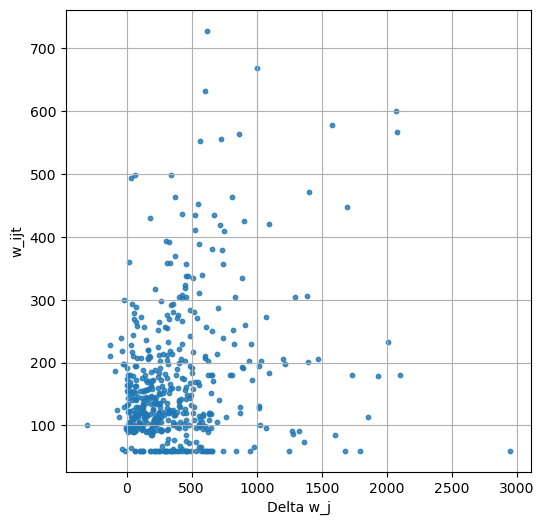

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(sec_df["wjt"][0:500], sec_df["w_{i,j,t}^c"][0:500], cmap='viridis', s=10, alpha=0.8)
plt.xlabel("Delta w_j")
plt.ylabel("w_ijt")
# plt.title("Scatter Plot of x vs y")
plt.grid(True)

## Classifier for each c

In [13]:
def eval_results(y_true, proba, pred, tag):
    auc = roc_auc_score(y_true, proba) if len(np.unique(y_true)) > 1 else np.nan
    prec = precision_score(y_true, pred, zero_division=0)
    rec  = recall_score(y_true, pred, zero_division=0)
    f1   = f1_score(y_true, pred, zero_division=0)
    cm = confusion_matrix(y_true, pred)

    print(f"\n===== Classifier for c={tag} =====")
    print("AUC:", auc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1:", f1)
    print("Confusion:\n", cm)

    return dict(auc=auc, precision=prec, recall=rec, f1=f1, cm=cm)


In [28]:
from sklearn.utils.class_weight import compute_class_weight
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings("ignore")   # silence Python warnings
os.environ["LIGHTGBM_VERBOSE"] = "-1"
# ----------------------------------------
# 3. Train a separate LightGBM per c
# ----------------------------------------
models_by_c = {}
metrics_by_c = {}

unique_c = sorted(df_s['c'].unique())

for cval in unique_c:
    print(f"\n### Training classifier for c={cval} ###")

    # subset for this c
    tr = train_df[train_df['c'] == cval].copy()
    te = test_df[test_df['c'] == cval].copy()

    X_tr = tr[feature_cols]
    y_tr = tr['y_occ'].values

    X_te = te[feature_cols]
    y_te = te['y_occ'].values

    # class weights
    classes = np.unique(y_tr)
    cw_vals = compute_class_weight(class_weight='balanced', classes=classes, y=y_tr)
    class_weight = {cls: w for cls, w in zip(classes, cw_vals)}

    # model
    model = LGBMClassifier(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=6,
        random_state=123,
        objective='binary',
        boosting_type='gbdt',
        class_weight=class_weight,
        verbose=-1 
    )

    # categorical feature names
    categorical_cols = other_cols

    model.fit(
        X_tr, y_tr,
        categorical_feature=categorical_cols
    )

    # predictions
    proba = model.predict_proba(X_te)[:,1]
    pred  = (proba >= 0.5).astype(int)

    # evaluate
    metrics = eval_results(y_te, proba, pred, tag=cval)

    # store
    models_by_c[cval] = model
    metrics_by_c[cval] = metrics

    print(f"\n=== Top Features for c={cval} ===")
    importances = model.feature_importances_
    feature_names = X_tr.columns

    
    # convert to percentage
    importance_pct = 100 * importances / importances.sum()
    
    # Build dataframe
    feat_imp_pct = (
        pd.DataFrame({
            "feature": feature_names,
            "importance_pct": importance_pct
        })
        .sort_values("importance_pct", ascending=False)
    )
    print(feat_imp_pct.head(10).to_string(index=False))


# # ----------------------------------------
# # 4. Feature Importances for each c
# # ----------------------------------------
# for cval, model in models_by_c.items():
#     print(f"\n=== Top Features for c={cval} ===")
#     imp = pd.DataFrame({
#         'feature': feature_cols,
#         'importance': model.feature_importances_
#     }).sort_values('importance', ascending=False)
#     print(imp.head(20))


### Training classifier for c=1134.0 ###

===== Classifier for c=1134.0 =====
AUC: 0.7282082345166672
Precision: 0.09204359257706816
Recall: 0.510946589106293
F1: 0.1559871490612034
Confusion:
 [[186591  47655]
 [  4624   4831]]

=== Top Features for c=1134.0 ===
         feature  importance_pct
       station_j       35.916667
              r0       32.683333
             wjt        2.066667
           wit-1        1.750000
   gplus_0_x_wjt        1.516667
         gplus_0        1.333333
         gplus_1        1.250000
          Δwjt-1        1.166667
gminus_0_x_wit-1        1.016667
            Δwjt        0.983333

### Training classifier for c=1135.0 ###

===== Classifier for c=1135.0 =====
AUC: 0.797136458830116
Precision: 0.21428571428571427
Recall: 0.05172413793103448
F1: 0.08333333333333333
Confusion:
 [[1652   11]
 [  55    3]]

=== Top Features for c=1135.0 ===
        feature  importance_pct
 gminus_0_x_wjt        4.352296
          wit-1        4.318026
             r0  

In [18]:
# Create explainer (TreeExplainer for LightGBM)
explainer = shap.TreeExplainer(models_by_c[1137])

te = test_df[test_df['c'] == 1137].copy()
X_te = te[feature_cols]

shap_values = explainer.shap_values(X_te)

# ---- summary plot ----
plt.figure(figsize=(10, 6))
shap.summary_plot(
    shap_values, 
    X_te,
    feature_names=feature_cols,
    show=False      # IMPORTANT
)

plt.tight_layout()
plt.savefig("shap_summary_plot_c1137.png", dpi=300)
plt.close()

# Predict the Amount of Secondary Delay

In [32]:
sec_df = pd.read_parquet(os.path.join(DATA_DIR, 'Data_for_classifier.parquet'),
                           engine="fastparquet")
# sec_df
top_pair = sec_df.groupby(['i', 'j']).size().reset_index(name='count').sort_values('count', ascending=False).head(10)
# sec_df = sec_df[(sec_df['i'] == top_pair['i'].iloc[0]) & (sec_df['j'] == top_pair['j'].iloc[0]) & (sec_df['w_{i,j,t}^c'] > 0)]
# sec_df = sec_df[(sec_df['i'] == top_pair['i'].iloc[4]) & (sec_df['j'] == top_pair['j'].iloc[4]) & (sec_df['w_{i,j,t}^c'] > 0) & (sec_df['c'] == 1137)]
# sec_df = sec_df[(sec_df['i'] == top_pair['i'].iloc[9]) & (sec_df['j'] == top_pair['j'].iloc[9]) & (sec_df['w_{i,j,t}^c'] > 0)]
# sec_df['Δwjt'] = sec_df['Δwjt'].abs()
# sec_df['Δwjt-1'] = sec_df['Δwjt-1'].abs()
# sec_df['Δwjt-2'] = sec_df['Δwjt-2'].abs()
# sec_df['w_{i,j,t}^c'] = sec_df['w_{i,j,t}^c'] - 60
# sec_df = sec_df[(sec_df['w_{i,j,t}^c'] > 300) & ((sec_df['wjt'] > 300))]
sec_df['log_wjt'] = np.where(sec_df['wjt'] > 0, np.log(sec_df['wjt']), 0)
sec_df['wjt2'] = (sec_df['wjt']) ** 2
# sec_df = sec_df[(sec_df['w_{i,j,t}^c'] > 600) & (sec_df['wjt'] < 100)]
# sec_df['maxw'] = np.maximum(sec_df['wjt'],sec_df['wit-1'])
sec_df

C:\Users\Iceman\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Iceman\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,gplus_0,gplus_1,gplus_2,gminus_0,gminus_1,gminus_2,i,j,t,c,"w_{i,j,t}^c",wjt,wit-1,Δwjt,Δwjt-1,Δwjt-2,Δwjt-3,r0,day,month,date,train_id,station_j,cnt_moves,cnt_platform_out_moves,cnt_red,cnt_kruising,sum_pri_delay,cnt_pri_delay,cnt_change_comp,cnt_trains,cnt_S_NORMAL,cnt_S_WRONG,cnt_signals,incident,density,complexity,non_robustness,operational_factor,C_cnt_signals_mean,D_cnt_signals_mean,E_cnt_signals_mean,G_cnt_signals_mean,I_cnt_signals_mean,M_cnt_signals_mean,N_cnt_signals_mean,R_cnt_signals_mean,T_cnt_signals_mean,C_incident_mean,D_incident_mean,E_incident_mean,G_incident_mean,I_incident_mean,M_incident_mean,N_incident_mean,R_incident_mean,T_incident_mean,C_density_mean,D_density_mean,E_density_mean,G_density_mean,I_density_mean,M_density_mean,N_density_mean,R_density_mean,T_density_mean,C_complexity_mean,D_complexity_mean,E_complexity_mean,G_complexity_mean,I_complexity_mean,M_complexity_mean,N_complexity_mean,R_complexity_mean,T_complexity_mean,C_non_robustness_mean,D_non_robustness_mean,E_non_robustness_mean,G_non_robustness_mean,I_non_robustness_mean,M_non_robustness_mean,N_non_robustness_mean,R_non_robustness_mean,T_non_robustness_mean,C_operational_factor_mean,D_operational_factor_mean,E_operational_factor_mean,G_operational_factor_mean,I_operational_factor_mean,M_operational_factor_mean,N_operational_factor_mean,R_operational_factor_mean,T_operational_factor_mean,log_wjt,wjt2
0,1.0,0.0,0.0,0.0,0.0,0.0,-99970.0,-71996.0,831.0,1134.0,0.0,66.0,331.0,-88.0,2.0,38.0,17.0,255.0,1.0,4.0,3.0,-71996.0,765.0,13.0,4.0,3.0,0.0,4.0,1.0,0.0,8.0,20.0,5.0,25.0,4.0,0.65,0.00,0.23,0.0,36.200001,40.25,59.5,31.666666,44.555557,36.857143,61.000000,36.75,45.250000,0.2,0.125,6.50,2.444444,1.666667,0.571429,4.000000,47.333332,7.500000,0.288961,0.253788,0.366667,0.524904,0.380192,0.206897,0.256927,0.280556,0.109677,0.107143,0.000000,0.148148,0.115385,0.142857,0.083333,0.000000,0.037037,0.0,0.224719,0.119403,0.285714,0.197080,0.151261,0.187500,0.186275,0.188119,0.235294,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,4.189655,4356.0
1,1.0,0.0,0.0,0.0,0.0,0.0,-99970.0,-71996.0,831.0,1134.0,0.0,66.0,331.0,-88.0,2.0,38.0,17.0,255.0,1.0,4.0,3.0,-71996.0,732.0,15.0,3.0,2.0,1.0,0.0,0.0,0.0,4.0,23.0,11.0,34.0,0.0,0.65,0.33,0.13,0.0,36.200001,40.25,59.5,31.666666,44.555557,36.857143,61.000000,36.75,45.250000,0.2,0.125,6.50,2.444444,1.666667,0.571429,4.000000,47.333332,7.500000,0.288961,0.253788,0.366667,0.524904,0.380192,0.206897,0.256927,0.280556,0.109677,0.107143,0.000000,0.148148,0.115385,0.142857,0.083333,0.000000,0.037037,0.0,0.224719,0.119403,0.285714,0.197080,0.151261,0.187500,0.186275,0.188119,0.235294,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,4.189655,4356.0
2,0.0,0.0,0.0,1.0,0.0,0.0,-99970.0,-71996.0,833.0,1134.0,0.0,17.0,334.0,-13.0,-36.0,-88.0,2.0,257.0,1.0,4.0,3.0,-71996.0,1506.0,13.0,4.0,3.0,0.0,4.0,1.0,0.0,8.0,20.0,5.0,25.0,4.0,0.65,0.00,0.23,0.0,36.200001,40.25,59.5,31.666666,44.555557,36.857143,61.000000,36.75,45.250000,0.2,0.125,6.50,2.444444,1.666667,0.571429,4.000000,47.333332,7.500000,0.288961,0.253788,0.366667,0.524904,0.380192,0.206897,0.256927,0.280556,0.109677,0.107143,0.000000,0.148148,0.115385,0.142857,0.083333,0.000000,0.037037,0.0,0.224719,0.119403,0.285714,0.197080,0.151261,0.187500,0.186275,0.188119,0.235294,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,2.833213,289.0
3,0.0,0.0,0.0,1.0,0.0,0.0,-99970.0,-71996.0,833.0,1134.0,0.0,17.0,334.0,-13.0,-36.0,-88.0,2.0,257.0,1.0,4.0,3.0,-71996.0,1586.0,13.0,4.0,3.0,0.0,4.0,1.0,0.0,8.0,20.0,5.0,25.0,4.0,0.65,0.00,0.23,0.0,36.200001,40.25,59.5,31.666666,44.555557,36.857143,61.000000,36.75,45.250000,0.2,0.125,6.50,2.444444,1.666667,0.571429,4.000000,47.333332,7.500000,0.288961,0.253788,0.366667,0.524904,0.380192,0.206897,0.256927,0.280556,0.109677,0.107143,0.000000,0.148148,0.115385,0.142857,0.083333,0.000000,0.037037,0.0,0.224719,0.119403,0.285714,0.197080,0.151261,0.187500,0.186275,0.188119,0.235294,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,2.833213,2

In [99]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import (
    roc_auc_score, precision_score, recall_score, f1_score,
    mean_squared_error, mean_absolute_error, r2_score, confusion_matrix
)
from category_encoders import TargetEncoder
from sklearn.pipeline import Pipeline

# -------------------------
# 5. Stage 2: Regression for timing (only days where event actually happened)
# -------------------------

# target is event_r0 (time-in-day), could be big numbers; optionally log-transform
train_reg = train_df[train_df['y_occ'] == 1]
test_reg = test_df[test_df['y_occ'] == 1]

# train_reg = train_df[(train_df['y_occ'] == 1) & (train_df['c'] == 1134)]
# test_reg = test_df[(test_df['y_occ'] == 1) & (test_df['c'] == 1134)]

# feature_cols = categorical_cols

y_train_reg = train_reg['sec_del'].astype(float)
y_test_reg  = test_reg['sec_del'].astype(float)
X_train_reg = train_reg[feature_cols].astype(float).fillna(0.0)
X_test_reg  = test_reg[feature_cols].astype(float).fillna(0.0)


# choose regressor
# regr = GradientBoostingRegressor(n_estimators=300, max_depth=4, learning_rate=0.05, random_state=42)

regr = Pipeline([
    ("encode", TargetEncoder(cols=categorical_cols)),
    ("gb", GradientBoostingRegressor(n_estimators=300, max_depth=4, learning_rate=0.05, random_state=42))
])
regr.fit(X_train_reg, y_train_reg)

# predict
y_pred_reg = np.maximum(thres_sec, regr.predict(X_test_reg))

print("Stage2 - Regression metrics (timing on days with event):")
print("R2:", r2_score(y_test_reg, y_pred_reg))
print("Adj_R2:", 1 - (1-r2_score(y_test_reg, y_pred_reg)) * (len(y_test_reg)-1)/(len(y_test_reg)-X_test_reg.shape[1]-1))

print("RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_reg)))
print("MAE:", mean_absolute_error(y_test_reg, y_pred_reg))

# top regression importances
encoder = regr.named_steps["encode"]
X_train_transformed = encoder.transform(X_train_reg)
gb_model = regr.named_steps["gb"]
imp_reg = pd.Series(gb_model.feature_importances_,
                    index=X_train_transformed.columns).sort_values(ascending=False)

print("\nTop regressor features:\n", imp_reg.head(20))

Stage2 - Regression metrics (timing on days with event):
R2: 0.15160953801527643
Adj_R2: 0.14198936375657067
RMSE: 132.24861372443803
MAE: 80.04957994304891

Top regressor features:
 station_j             0.278473
wjt                   0.190053
wit-1                 0.100146
r0                    0.039631
C_cnt_signals_mean    0.021146
Δwjt                  0.020202
gplus_1_x_wit-1       0.019343
gplus_0_x_Δwjt        0.015594
gplus_1_x_Δwjt-1      0.012344
density               0.012020
gplus_0_x_Δwjt-1      0.011248
gminus_1_x_Δwjt-1     0.008894
M_density_mean        0.008706
N_incident_mean       0.008315
gminus_1_x_wit-1      0.007870
gplus_0_x_wit-1       0.007153
D_cnt_signals_mean    0.006742
I_incident_mean       0.006241
Δwjt-1                0.006081
gplus_1_x_wjt         0.006043
dtype: float64


In [90]:
encoder = regr.named_steps["encode"]
gb_model = regr.named_steps["gb"]

X_test_enc = encoder.transform(X_test_reg)


In [91]:
import shap

explainer = shap.TreeExplainer(gb_model)
shap_values = explainer.shap_values(X_test_enc)


In [92]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
shap.summary_plot(
    shap_values,
    X_test_enc,
    feature_names=X_test_enc.columns,
    show=False
)
plt.tight_layout()
plt.savefig("shap_summary_gb_regressor_c1137.png", dpi=300)
plt.close()

Text(0, 0.5, 'real')

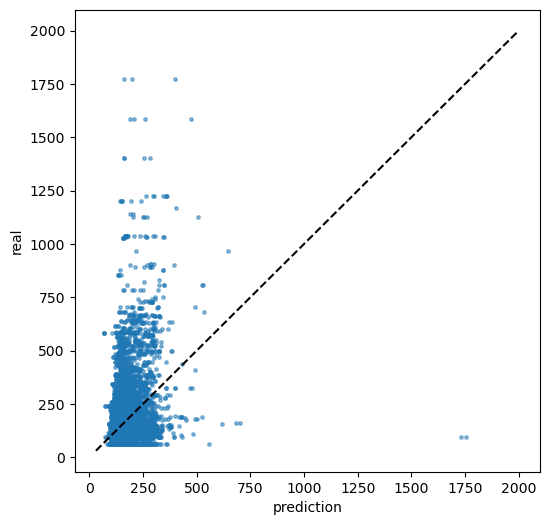

In [98]:
plt.figure(figsize=(6, 6))
plt.plot([30, 2000], [30, 2000], 'k--', label="Ideal y=x")
plt.scatter(y_pred_reg, y_test_reg, cmap='viridis', s=6, alpha=0.5)
plt.xlabel("prediction")
plt.ylabel("real")

## Linear Regression

In [93]:
from sklearn.linear_model import LinearRegression

linreg = Pipeline([
    ("encode", TargetEncoder(cols=categorical_cols)),
    ("lr", LinearRegression())
])

linreg.fit(X_train_reg, y_train_reg)

y_train_pred_reg = np.maximum(thres_sec, linreg.predict(X_train_reg))
y_test_pred_reg = np.maximum(thres_sec, linreg.predict(X_test_reg))

print("Stage2 - Linear Regression metrics:")
print("training data")
print("R2:", r2_score(y_train_reg, y_train_pred_reg))

k = X_train_reg.shape[1]
adj_r2 = 1 - (1 - r2_score(y_train_reg, y_train_pred_reg)) * (len(y_train_reg) - 1) / (len(y_train_reg) - k - 1)
print("Adj_R2:", adj_r2)

print("RMSE:", np.sqrt(mean_squared_error(y_train_reg, y_train_pred_reg)))
print("MAE:", mean_absolute_error(y_train_reg, y_train_pred_reg))


print("-----------------------")
print("testing data")
print("R2:", r2_score(y_test_reg, y_test_pred_reg))

k = X_test_reg.shape[1]
adj_r2 = 1 - (1 - r2_score(y_test_reg, y_test_pred_reg)) * (len(y_test_reg) - 1) / (len(y_test_reg) - k - 1)
print("Adj_R2:", adj_r2)

print("RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_test_pred_reg)))
print("MAE:", mean_absolute_error(y_test_reg, y_test_pred_reg))


Stage2 - Linear Regression metrics:
training data
R2: 0.13779448774255676
Adj_R2: 0.13556835732484185
RMSE: 99.944134943593
MAE: 62.3219372341091
-----------------------
testing data
R2: 0.07451730029837189
Adj_R2: 0.06924162586070726
RMSE: 112.0121608982285
MAE: 68.58569643421619


In [94]:
encoder = linreg.named_steps["encode"]
lr_model = linreg.named_steps["lr"]

X_train_enc = encoder.transform(X_train_reg)
X_test_enc  = encoder.transform(X_test_reg)


In [95]:
import shap

explainer = shap.LinearExplainer(
    lr_model,
    X_test_enc,        # background dataset
    feature_perturbation="interventional"
)
shap_values = explainer.shap_values(X_test_enc)


In [96]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
shap.summary_plot(
    shap_values,
    X_test_enc,
    feature_names=X_test_enc.columns,
    show=False
)
plt.tight_layout()
plt.savefig("shap_linear_c1137_summary.png", dpi=300)
plt.close()

# Two-stage Predicition

In [20]:
test_gel = test_df.copy()
test_gel["y_occ_pred_prob"] = gb.predict_proba(test_df[feature_cols])[:,1]
test_gel["y_occ_pred"] = (test_gel["y_occ_pred_prob"] > 0.5).astype(int)

In [21]:
mask_delay = test_gel["y_occ_pred"] == 1

# subset for regression
X_reg_test = test_gel.loc[mask_delay, feature_cols]
X_reg_test = X_reg_test.replace([np.inf, -np.inf], np.nan)
X_reg_test = X_reg_test.astype(float).fillna(0.0)
y_hat = regr.predict(X_reg_test)

test_gel["w_hat"] = 0.0         # default = no delay
test_gel.loc[mask_delay, "w_hat"] = y_hat

test_gel.loc[mask_delay, "w_hat"] = (
    test_gel.loc[mask_delay, "w_hat"].clip(lower=thres_sec)
)


In [81]:
test_gel[0:50]

,gplus_0,gplus_1,gplus_2,gminus_0,gminus_1,gminus_2,i,j,t,c,"w_{i,j,t}^c",wjt,wit-1,Δwjt,Δwjt-1,Δwjt-2,Δwjt-3,r0,day,month,date,train_id,station_j,cnt_moves,cnt_platform_out_moves,cnt_red,cnt_kruising,sum_pri_delay,cnt_pri_delay,cnt_change_comp,cnt_trains,cnt_S_NORMAL,cnt_S_WRONG,cnt_signals,incident,density,complexity,non_robustness,operational_factor,C_cnt_signals_mean,D_cnt_signals_mean,E_cnt_signals_mean,G_cnt_signals_mean,I_cnt_signals_mean,M_cnt_signals_mean,N_cnt_signals_mean,R_cnt_signals_mean,T_cnt_signals_mean,C_incident_mean,D_incident_mean,E_incident_mean,G_incident_mean,I_incident_mean,M_incident_mean,N_incident_mean,R_incident_mean,T_incident_mean,C_density_mean,D_density_mean,E_density_mean,G_density_mean,I_density_mean,M_density_mean,N_density_mean,R_density_mean,T_density_mean,C_complexity_mean,D_complexity_mean,E_complexity_mean,G_complexity_mean,I_complexity_mean,M_complexity_mean,N_complexity_mean,R_complexity_mean,T_complexity_mean,C_non_robustness_mean,D_non_robustness_mean,E_non_robustness_mean,G_non_robustness_mean,I_non_robustness_mean,M_non_robustness_mean,N_non_robustness_mean,R_non_robustness_mean,T_non_robustness_mean,C_operational_factor_mean,D_operational_factor_mean,E_operational_factor_mean,G_operational_factor_mean,I_operational_factor_mean,M_operational_factor_mean,N_operational_factor_mean,R_operational_factor_mean,T_operational_factor_mean,log_wjt,wjt2,y_occ,sec_del,gplus_0_x_wit-1,gplus_0_x_log_wjt,gplus_0_x_wjt,gplus_0_x_wjt2,gplus_0_x_Δwjt,gplus_0_x_Δwjt-1,gplus_0_x_Δwjt-2,gplus_1_x_wit-1,gplus_1_x_log_wjt,gplus_1_x_wjt,gplus_1_x_wjt2,gplus_1_x_Δwjt,gplus_1_x_Δwjt-1,gplus_1_x_Δwjt-2,gplus_2_x_wit-1,gplus_2_x_log_wjt,gplus_2_x_wjt,gplus_2_x_wjt2,gplus_2_x_Δwjt,gplus_2_x_Δwjt-1,gplus_2_x_Δwjt-2,gminus_0_x_wit-1,gminus_0_x_log_wjt,gminus_0_x_wjt,gminus_0_x_wjt2,gminus_0_x_Δwjt,gminus_0_x_Δwjt-1,gminus_0_x_Δwjt-2,gminus_1_x_wit-1,gminus_1_x_log_wjt,gminus_1_x_wjt,gminus_1_x_wjt2,gminus_1_x_Δwjt,gminus_1_x_Δwjt-1,gminus_1_x_Δwjt-2,gminus_2_x_wit-1,gminus_2_x_log_wjt,gminus_2_x_wjt,gminus_2_x_wjt2,gminus_2_x_Δwjt,gminus_2_x_Δwjt-1,gminus_2_x_Δwjt-2,y_occ_pred_prob,y_occ_pred,w_hat
170,2.0,0.0,0.0,0.0,0.0,0.0,-99970.0,-71996.0,6878.0,1134.0,0.0,12.0,-19.0,2.0,6.0,1.0,-37.0,254.0,1.0,4.0,24.0,-71996.0,1578.0,14.0,2.0,1.0,0.0,0.0,0.0,0.0,4.0,20.0,12.0,32.0,0.0,0.70,0.00,0.07,0.0,38.099998,39.000,56.25,36.500,46.500000,40.166668,59.700001,36.909092,29.250000,1.900000,1.250,6.00,1.500,2.900000,3.500000,1.200000,3.636364,1.750000,0.339744,0.334586,0.424390,0.395918,0.379888,0.252336,0.300459,0.314869,0.118343,0.032258,0.125000,0.206897,0.058824,0.125000,0.214286,0.000000,0.105263,0.0,0.169811,0.101124,0.287356,0.123711,0.147059,0.240741,0.122137,0.277778,0.600000,0.0,0.0,0.00,0.0,0.0,0.214286,0.000000,0.0,0.0,2.484907,144.0,0,0.0,-38.0,4.969813,24.0,288.0,4.0,12.0,2.0,-0.0,0.000000,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.000000,0.0,0.0,0.0,0.0,0.0,-0.0,0.000000,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.521726,0,0.000000
171,2.0,0.0,0.0,0.0,0.0,0.0,-99970.0,-71996.0,6878.0,1134.0,0.0,12.0,-19.0,2.0,6.0,1.0,-37.0,254.0,1.0,4.0,24.0,-71996.0,732.0,14.0,2.0,1.0,0.0,0.0,0.0,0.0,4.0,20.0,12.0,32.0,0.0,0.70,0.00,0.07,0.0,38.099998,39.000,56.25,36.500,46.500000,40.166668,59.700001,36.909092,29.250000,1.900000,1.250,6.00,1.500,2.900000,3.500000,1.200000,3.636364,1.750000,0.339744,0.334586,0.424390,0.395918,0.379888,0.252336,0.300459,0.314869,0.118343,0.032258,0.125000,0.206897,0.058824,0.125000,0.214286,0.000000,0.105263,0.0,0.169811,0.101124,0.287356,0.123711,0.147059,0.240741,0.122137,0.277778,0.600000,0.0,0.0,0.00,0.0,0.0,0.214286,0.000000,0.0,0.0,2.484907,144.0,0,0.0,-38.0,4.969813,24.0,288.0,4.0,12.0,2.0,-0.0,0.000000,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.000000,0.0,0.0,0.0,0.0,0.0,-0.0,0.000000,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.568938,1,159.367031
172,2.0,0.0,0.0,0.0,0.0,0.0,-99970.0,-71996.0,6878.0,1134.0,0.0,12.0,-19.0,2.0,6.0,1.0,-37.0,254.

In [22]:
print("Prediction metrics (timing on days with event):")
print("R2:", r2_score(test_gel['w_hat'], test_gel['sec_del']))
print("Adj_R2:", 1 - (1-r2_score(test_gel['w_hat'], test_gel['sec_del'])) * (len(test_gel['sec_del'])-1)/(len(test_gel['sec_del'])-X_reg_test.shape[1]-1))

print("RMSE:", np.sqrt(mean_squared_error(test_gel['w_hat'], test_gel['sec_del'])))
print("MAE:", mean_absolute_error(test_gel['w_hat'], test_gel['sec_del']))

Prediction metrics (timing on days with event):
R2: -0.1459998357520489
Adj_R2: -0.14615930749635853
RMSE: 112.22951190232948
MAE: 40.5692887743643


C:\Users\Iceman\AppData\Local\Temp\ipykernel_8448\2952670276.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(test_gel['w_hat'], test_gel['sec_del'], cmap='viridis', s=6, alpha=0.5)


Text(0, 0.5, 'real')

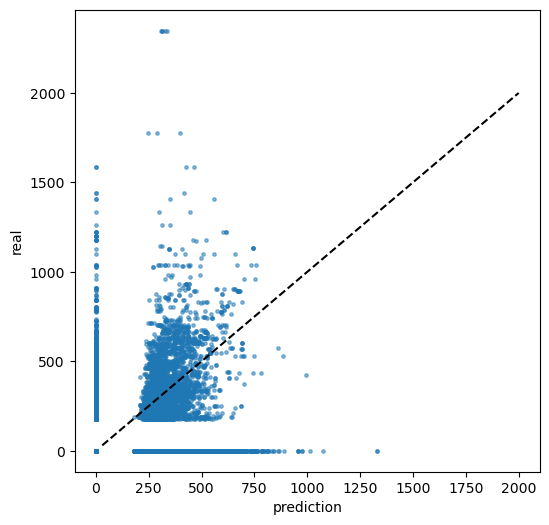

In [24]:
plt.figure(figsize=(6, 6))
plt.plot([30, 2000], [30, 2000], 'k--', label="Ideal y=x")
plt.scatter(test_gel['w_hat'], test_gel['sec_del'], cmap='viridis', s=6, alpha=0.5)
plt.xlabel("prediction")
plt.ylabel("real")